# 1872-2018年 足球世界杯赛事数据分析

此数据集大致有4万场国际足球赛事的结果,包括世界杯正赛、预选赛、亚洲杯、欧洲杯、国家之间的友谊赛等. 数据来源:kaggle.com

## 项目流程：

1、 筛选出世界杯所有正赛的数据,并进行数据清洗     
2、 筛选出比赛前20强数据情况  
2.1 获取世界杯所有比赛获胜场数最多的前20强数据  
2.2 各个国家队进球总数量情况  
3、2018年世界杯32强分析  
3.1 自1872年以来，32强数据情况   
3.2 自1978年以来，32强数据情况  
3.3 自2002年以来，32强数据情况  
4、综合结论  

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pyecharts import options as opts
from pyecharts.charts import Bar,Geo,WordCloud

%matplotlib inline
plt.style.use('ggplot')

In [2]:
file_path='data/data.csv'
df = pd.read_csv(file_path,encoding='utf-8')  # ISO-8859-1
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


数据集中所包含字段: 日期,主队名称,客队名称,主队进球数,客队进球数,比赛类型,所在城市,所在国家,是否中立

### 1、 获取世界杯所有正赛的数据


我们需要将世界杯正赛的数据从总的数据集中筛选出来  
紧接着我们将会进行数据清洗,把日期列的格式转换为datetime,并根据原有数据新增一些字段：净胜球,获胜球队名,比赛所在年份

In [3]:
# df['tournament'].value_counts() 我们需要将世界杯赛事的数据从总的国际各项足球赛事数据集中筛选出来

In [4]:
df_FIFA_total = df[df['tournament'].str.contains('FIFA')]

In [5]:
df_FIFA_total['tournament'].value_counts()

FIFA World Cup qualification    7100
FIFA World Cup                   836
Name: tournament, dtype: int64

In [6]:
df_FIFA = df_FIFA_total[df_FIFA_total['tournament']=='FIFA World Cup']
df_FIFA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 1277 to 35597
Data columns (total 9 columns):
date          836 non-null object
home_team     836 non-null object
away_team     836 non-null object
home_score    836 non-null int64
away_score    836 non-null int64
tournament    836 non-null object
city          836 non-null object
country       836 non-null object
neutral       836 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 59.6+ KB


In [7]:
df_FIFA.loc[:,'date']= pd.to_datetime(df_FIFA['date'])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
df_FIFA.loc[:,'year'] = df_FIFA['date'].dt.year

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [9]:
df_FIFA['year'].value_counts()

2014    64
2010    64
2006    64
2002    64
1998    64
1994    52
1990    52
1986    52
1982    52
1974    38
1978    38
1958    35
1970    32
1966    32
1962    32
1954    26
1950    22
1938    18
1930    18
1934    17
Name: year, dtype: int64

In [10]:
df_FIFA.loc[:,'diff_score'] = df_FIFA['home_score']-df_FIFA['away_score']

In [11]:
df_FIFA.loc[df_FIFA['diff_score']> 0, 'win_team'] = df_FIFA.loc[df_FIFA['diff_score']> 0, 'home_team']
df_FIFA.loc[df_FIFA['diff_score']< 0, 'win_team'] = df_FIFA.loc[df_FIFA['diff_score']< 0, 'away_team']
df_FIFA.loc[df_FIFA['diff_score']== 0, 'win_team'] = 'Draw'

In [12]:
df_FIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina


### 筛选出比赛前20强数据情况

In [13]:
winning_teams = df_FIFA.groupby('win_team')['date'].count()
winning_teams.sort_values(ascending=False,inplace=True)
winning_teams

win_team
Draw                  186
Brazil                 70
Germany                66
Italy                  45
Argentina              42
Spain                  29
France                 28
Netherlands            27
England                26
Uruguay                20
Russia                 17
Sweden                 16
Hungary                15
Poland                 15
Belgium                14
Mexico                 14
Yugoslavia             14
Portugal               13
Austria                12
Switzerland            11
Czechoslovakia         11
Chile                  11
Romania                 8
USA                     8
Denmark                 8
Colombia                7
Paraguay                7
Croatia                 7
Nigeria                 5
Korea Republic          5
                     ... 
Cameroon                4
Ghana                   4
Japan                   4
Scotland                4
Peru                    4
Algeria                 3
Northern Ireland        3
Ser

删掉第一项draw后,我们将数据以条形图的形式呈现出来

In [41]:
# winning_teams.items   
data = winning_teams[1:20]

In [63]:
b = Bar()

b.add_xaxis(data.index.tolist())
b.add_yaxis("赢球场次", data.values.tolist())
b.set_global_opts(title_opts=opts.TitleOpts(title="赢球场次最多的前20个国家"),
                  yaxis_opts=opts.AxisOpts(name="次数"),
                  xaxis_opts=opts.AxisOpts(name="国家"))
b.render_notebook()

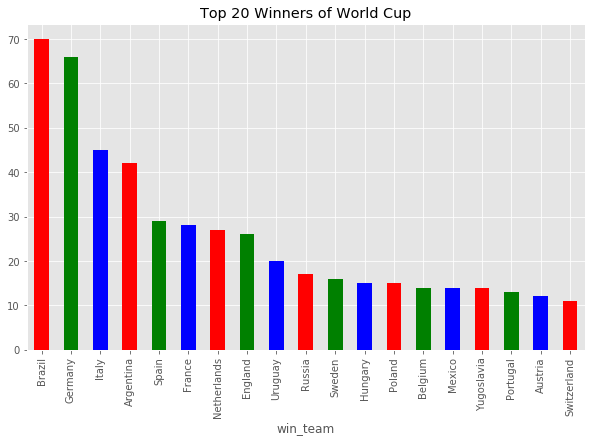

In [65]:
data.plot(kind='bar', figsize=(10,6), title='Top 20 Winners of World Cup',color=['r','g','b'])